In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

In [4]:
data = pd.read_csv('/Users/elliott.burton/Machine Learning/Shared/practice-datasets/black_friday_sales_train.csv')

In [5]:
dataSample = data.sample(frac=0.05, replace=True, random_state=1)

In [6]:
dataSample.describe

<bound method NDFrame.describe of         User_ID Product_ID Gender    Age  Occupation City_Category  \
128037  1001701  P00208242      F  26-35           4             B   
491755  1003744  P00139942      M  26-35           0             C   
470924  1000556  P00254242      F  26-35           9             B   
491263  1003680  P00080342      F  26-35           1             C   
371403  1003248  P00025942      F  26-35           7             B   
...         ...        ...    ...    ...         ...           ...   
154149  1005824  P00041842      M  18-25          12             B   
514971  1001320  P00177442      M  26-35           4             A   
304242  1004851  P00294542      M  18-25          17             C   
348015  1005601  P00208742      M  36-45           1             A   
209615  1002251  P00233842      M  36-45          14             A   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
128037                          1               0   

In [7]:
dataBackup = data

In [8]:
#data = dataSample

In [9]:
data = data.fillna(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
purchase_by_factor = {}
for c in data.columns[2:-1]:
    purchase_by_factor[c] = data.groupby(c)['Purchase'].sum()

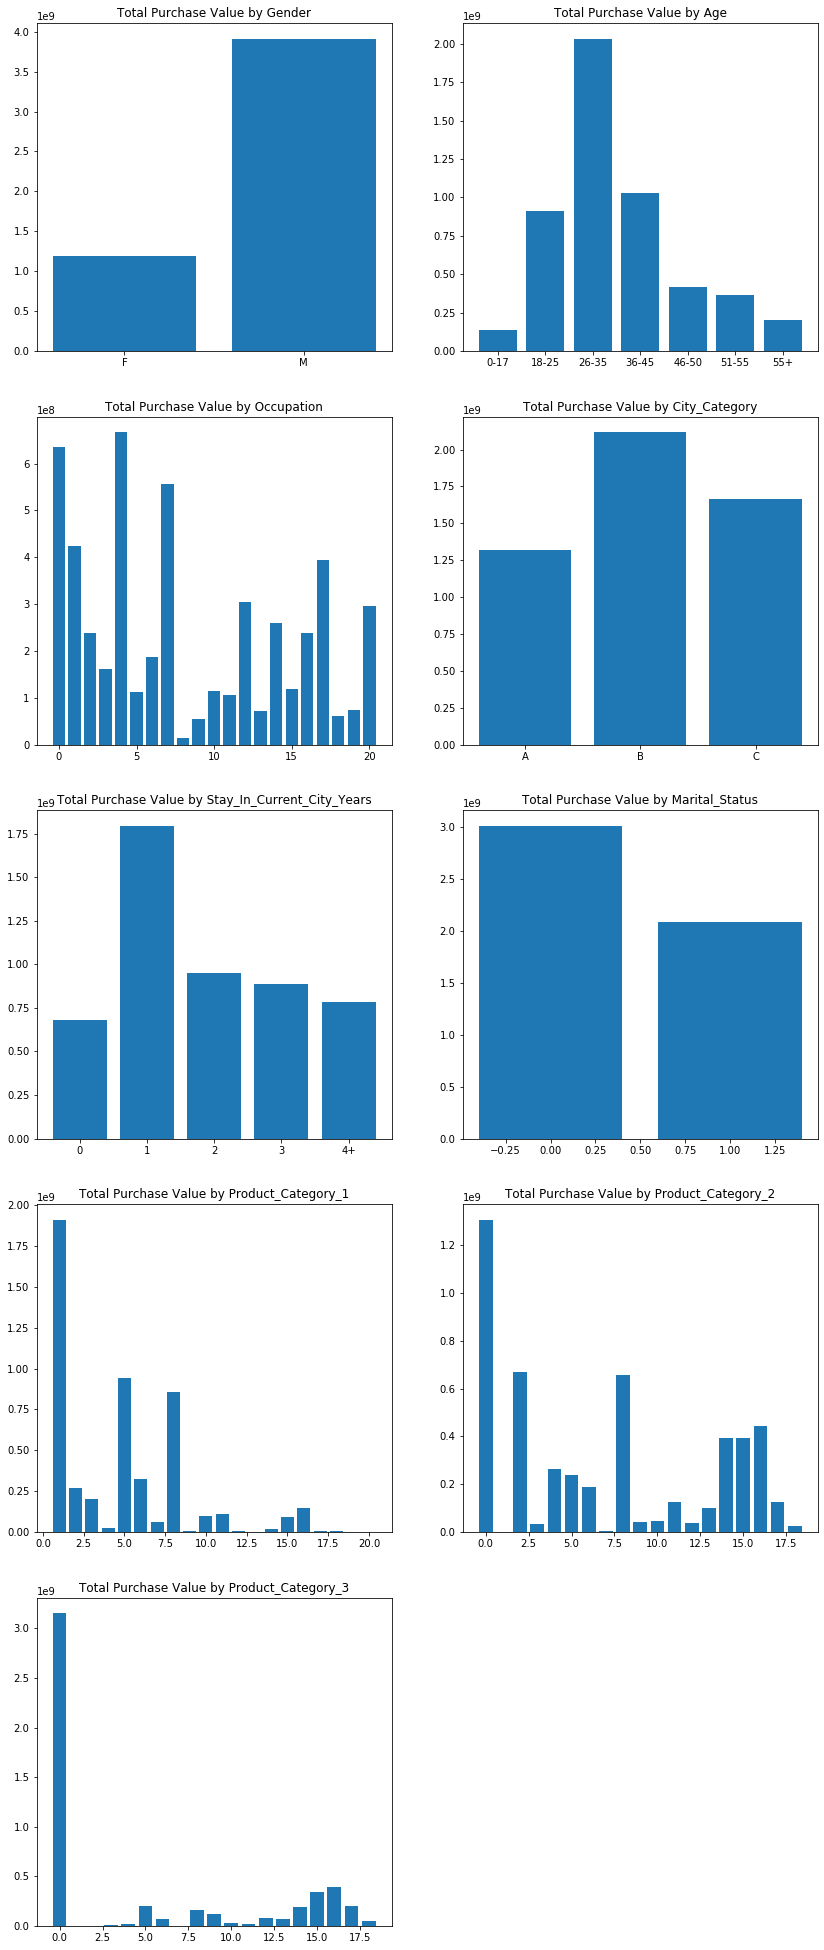

In [12]:
i = 1
plt.figure(figsize=(14, 35))
for c, p in purchase_by_factor.items():
    plt.subplot(5, 2, i)
    i += 1
    plt.bar(p.index, p.values)
    plt.title('Total Purchase Value by {}'.format(c))

In [13]:
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422


In [14]:
prodCatCheck = data.loc[data['Product_Category_1'] == 20]
prodCatCheck = prodCatCheck.sort_values('Purchase',ascending =False)
#prodCatCheck = data.loc[data['Product_ID'] == 'P00375436']

In [15]:
prodCatCheck['Purchase'].values

array([613, 613, 613, ..., 118, 118, 118], dtype=int64)

In [16]:
prodCatCheck = data.loc[data['Product_Category_1'] == 19]
prodCatCheck = prodCatCheck.sort_values('Purchase',ascending =False)

In [17]:
prodCatCheck['Purchase'].values

array([62, 62, 62, ..., 12, 12, 12], dtype=int64)

You can see above in the two examples that the minimum purchase price per product is a building block for the minimum purchase price in the next cluster of data. i.e. 12 minimum cluster 1, 24 minimum at custer 2, ten 36 and so on.
Because of this the clusters seem to be naturally created from combining products, I can ignore for the analysis.

In [18]:
data = data.drop(columns=['User_ID', 'Product_ID'])

In [19]:
encodeData = data
dummyData = data

In [20]:
dummydata = pd.get_dummies(data,drop_first =True)

In [21]:
dummydata.head(3)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0.0,0.0,8370,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,12,0.0,0.0,1422,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
encoder = LabelEncoder()

In [23]:
encodeData['Gender'] = encoder.fit_transform(encodeData['Gender'])
encodeData['Age'] = encoder.fit_transform(encodeData['Age'])
encodeData['City_Category'] = encoder.fit_transform(encodeData['City_Category'])
encodeData['Stay_In_Current_City_Years'] = encoder.fit_transform(encodeData['Stay_In_Current_City_Years'])

In [24]:
encodeData.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422


In [25]:
y= data['Purchase']

In [26]:
xReg = dummydata.drop('Purchase', axis=1)

In [27]:
xReg.head(3)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
Scaler = StandardScaler()

In [52]:
x = Scaler.fit_transform(xReg, y)

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(xReg, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
results = sm.OLS(y, sm.add_constant(xReg)).fit()

C:\Users\elliott.burton\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2010.
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:20:48   Log-Likelihood:            -5.4671e+06
No. Observations:              550068   AIC:                         1.093e+07
Df Residuals:                  550066   BIC:                         1.093e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8734.5658     13.605    641.990      0.0

### Pretty Bad R squared. Drop Product Category

In [57]:
xReg = xReg.drop(columns=['Product_Category_1', 'Product_Category_2','Product_Category_3'])

KeyError: "['Product_Category_1' 'Product_Category_2' 'Product_Category_3'] not found in axis"

In [33]:
lr.fit(xReg, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
results = sm.OLS(y, sm.add_constant(xReg)).fit()

C:\Users\elliott.burton\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     310.0
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:52:53   Log-Likelihood:            -5.4658e+06
No. Observations:              550068   AIC:                         1.093e+07
Df Residuals:                  550052   BIC:                         1.093e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [36]:
xReg = dummydata[['Gender_M']]

In [37]:
results = sm.OLS(y, sm.add_constant(xReg)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2010.
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:52:53   Log-Likelihood:            -5.4671e+06
No. Observations:              550068   AIC:                         1.093e+07
Df Residuals:                  550066   BIC:                         1.093e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8734.5658     13.605    641.990      0.0

## Attempt at Gradient Boost

In [38]:
xEncode = encodeData.drop('Purchase', axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(xEncode, y)

In [40]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1,3,5,10]
for i in learning_rate:
    regressor = GradientBoostingRegressor(max_depth=9,n_estimators=6,learning_rate=i)
    regressor.fit(X_train, y_train)
    errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
    best_n_estimators = np.argmin(errors)
    best_regressor = GradientBoostingRegressor(max_depth=9,n_estimators=2,learning_rate=i)
    best_regressor.fit(X_train, y_train)
    y_pred = best_regressor.predict(X_test)
    print(mean_absolute_error(y_test, y_pred))

4077.0132308182842
4071.863784329754
4020.6472468518396
3543.6858418925044
3117.0066769814534
2770.0543092943713
2185.3621550041694
14421.755717162454
57509.74509517422
291089.5092602371


In [41]:
learning_rate = [0.75,0.875,1,1.5,2,2.5,3]
for i in learning_rate:
    regressor = GradientBoostingRegressor(max_depth=9,n_estimators=6,learning_rate=i)
    regressor.fit(X_train, y_train)
    errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
    best_n_estimators = np.argmin(errors)
    best_regressor = GradientBoostingRegressor(max_depth=9,n_estimators=2,learning_rate=i)
    best_regressor.fit(X_train, y_train)
    y_pred = best_regressor.predict(X_test)
    print(mean_absolute_error(y_test, y_pred))

2225.6756201759913
2201.8363565348614
2185.4165215254143
2376.5710726517796
4074.110221613842
8186.456111541555
14421.741396255808


In [58]:
learning_rate = np.arange(0.75, 1.15, 0.01).tolist()
BestMeanErr = 10000
learningScore = []
for i in learning_rate:
    regressor = GradientBoostingRegressor(max_depth=9,n_estimators=3,learning_rate=i)
    regressor.fit(X_train, y_train)
    errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
    best_n_estimators = np.argmin(errors)
    best_regressor = GradientBoostingRegressor(max_depth=9,n_estimators=3,learning_rate=i)
    best_regressor.fit(X_train, y_train)
    y_pred = best_regressor.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    learningScore.append(MAE)
    if MAE < BestMeanErr:
        BestLearningRate = i
        BestMeanErr = MAE
    print(MAE)
print('\033[1m'+ str(BestLearningRate), ' is the best learning Rate')

2225.688865811078
2223.113502657603
2220.7406946290253
2219.429547705207
2217.374472587075
2215.729890357141
2213.8584238249514
2211.9666508755427
2209.732785453666
2208.517667136257
2207.4952009100693
2205.346374569436
2202.3457285406903
2201.6296516873063
2201.0603279523966
2200.242694912101
2199.7532161847303
2199.4501905907496
2199.1661041494363
2198.7808558259526
2199.0493326019273
2197.5236928148424
2194.9048606130004
2190.5551084630483
2185.799911189115
2185.471356243646
2186.5537891387676
2193.811584457435
2195.2330053838596
2196.0451192934324
2196.4649410555207
2196.6612649537997
2196.605228999436
2198.108679098315
2200.8157409827327
2201.087810840645
2199.340792440706
2201.0449299163
2201.8683918104202
2202.1501136756974
1.0000000000000002  is the best learning Rate


Text(0.5, 0, 'learning_rate')

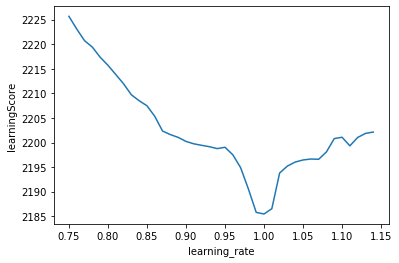

In [59]:
plt.plot(learning_rate, learningScore)
plt.ylabel('learningScore')
plt.xlabel('learning_rate')

In [69]:
best_regressor = GradientBoostingRegressor(max_depth=9,n_estimators=6,learning_rate=BestLearningRate)
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

2150.196167939063

Text(0.5, 0, 'learning_rate')

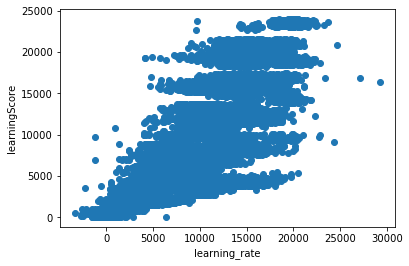

In [70]:
plt.scatter(y_pred, y_test)
plt.ylabel('learningScore')
plt.xlabel('learning_rate')

In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [73]:
from scipy.stats import norm

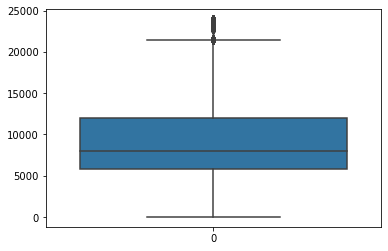

In [76]:
sns.boxplot(data=y)